Checking Odette's model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import astropy.units as u


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
mw, mf = np.loadtxt('DA_18952_761.dk', skiprows =35, unpack=True)

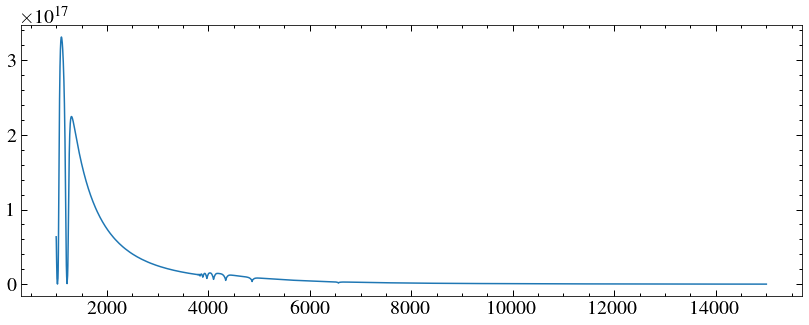

In [5]:
plt.plot(mw, mf)

5.3225321834242925


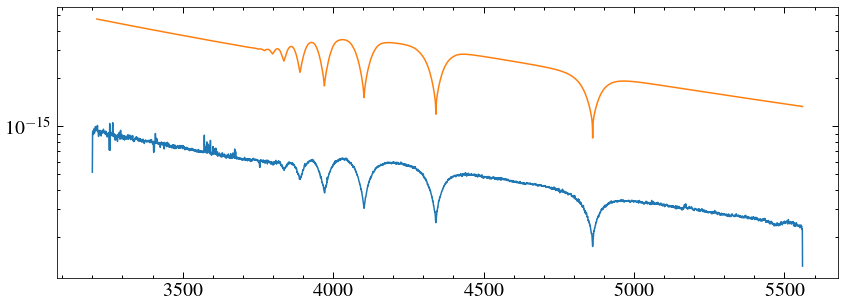

In [93]:
distance = (1/3.6515e-3)*u.pc
#radius = 0.0170*u.R_sun
#radius = 0.0165*u.R_sun
scale = (4*np.pi*(radius.to(u.cm) /distance.to(u.cm))**2)*1e-8

w, f, e = np.loadtxt('spectra/SDSSJ1144_old/SDSS1144_1_SCI_SLIT_FLUX_MERGE1D_UVB.csv', unpack=True, delimiter = ',')
mask = w > 3200
w, f, e = w[mask], f[mask], e[mask] 
f = convolve(f,Box1DKernel(6))
plt.plot(w,f)
mmask = (mw > w[0]) & (mw < w[-1])
plt.plot(mw[mmask], mf[mmask]*scale)
plt.yscale('log')
ns = np.trapz(mf[mmask]*scale, mw[mmask])/ np.trapz(f, w)
print(ns)
#plt.plot(mw[mmask], mf[mmask]*scale)


Check against photometry

In [51]:
phot = np.genfromtxt('1144_phot.txt', dtype=None, encoding=None, names=True)

array([('fuv', 1960700., 9.12e-04, 2.5e-05),
       ('nuv', 1296700., 6.55e-04, 1.8e-05),
       ('u',  851920., 4.46e-04, 2.9e-05),
       ('g',  621980., 4.38e-04, 4.0e-06),
       ('r',  479900., 3.12e-04, 9.0e-06),
       ('i',  392660., 2.38e-04, 7.0e-06),
       ('z',  332440., 1.79e-04, 1.0e-05),
       ('J',  240160., 1.17e-04, 3.0e-06),
       ('H',  183780., 7.76e-05, 7.6e-06),
       ('K',  136210., 6.58e-05, 7.5e-06),
       ('W1',   89490., 3.67e-05, 5.5e-06)],
      dtype=[('band', '<U3'), ('nuGHz', '<f8'), ('fnuJy', '<f8'), ('fnu_eJy', '<f8')])

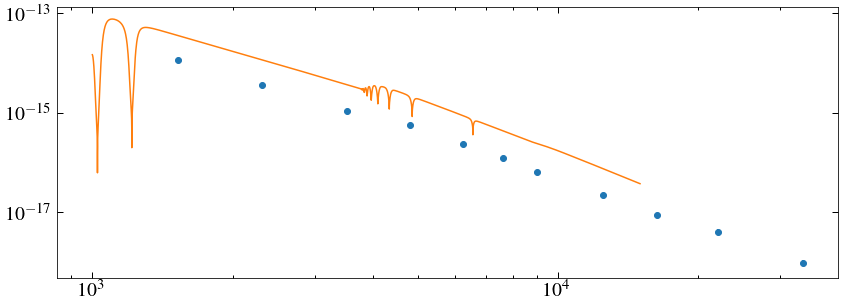

In [97]:
pw = (phot['nuGHz']*u.GHz).to(u.AA, equivalencies=u.spectral())
pf =  (phot['fnuJy']*u.Jy).to((u.erg/u.s/u.cm**2/u.AA), equivalencies=u.spectral_density(pw))
pe = (phot['fnu_eJy']/phot['fnuJy']) *pf
plt.errorbar(pw.value, pf.value, yerr=pe.value, marker='o', ls='none')
plt.xscale('log')
plt.yscale('log')
plt.plot(mw, mf*scale)

array([5.10021931e+10, 7.71188401e+10, 1.17381914e+11, 1.60776874e+11,
       2.08376745e+11, 2.54673254e+11, 3.00806161e+11, 4.16389074e+11,
       5.44128850e+11, 7.34160487e+11, 1.11744329e+12])